# Bank Customer Segmentation (Clustering)
This project is a Bank customer segmentation using K-Means algorithm to clustering customer based on customer's CreditScore, Balance,and Age, from the dataset on Kaggle. For pre-processing, PCA (Principal Component Analysis) is performed to reduced the selected dimensions into two main components. Next, using Sillhoute score to determined the optimum number of cluster and then performing the k-means algorithm.

In [69]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [106]:
#Import dataset
df = pd.read_excel("Bank-Customer-Attrition-Insights-Data.xlsx")
df2 = df[['CreditScore','Balance','Age']]
display(df2.head())

,CreditScore,Balance,Age
0,619,0.00,42
1,608,83807.86,41
2,502,159660.80,42
3,699,0.00,39
4,850,125510.82,43


In [71]:
#Number of entries
row, col = df2.shape
print(f'There are {row} rows and {col} columns') 

There are 10000 rows and 3 columns


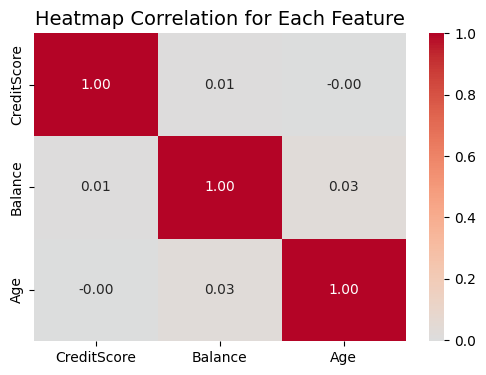

In [72]:
#Dataset visualization using heatmap
cols = ['CreditScore','Balance','Age']
corr = df2[cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Heatmap Correlation for Each Feature", fontsize=14)
plt.show()


Apparenly, there is only little correlation between the three features (dimensions.)


In [94]:
#Standarize feature
X = df2.values
X = StandardScaler().fit_transform(X)

In [ ]:
#PCA analysis to reduce dimensions
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(X)
PCA_dataset1 = pd.DataFrame(data=pca_2, columns=['component1', 'component2'])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))


Explained variation per principal component: [0.34280164 0.33388278]
Cumulative variance explained by 2 principal components: 67.67%


In [96]:
dataset_pca = pd.DataFrame(abs(pca.components_), columns=df2.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



       CreditScore   Balance       Age
PC_1     0.059163  0.711186  0.700510
PC_2     0.970335  0.123815  0.207654


In [97]:
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())

As per PC 1:
 Balance    0.711186
Age        0.700510
Name: PC_1, dtype: float64

As per PC 2:
 CreditScore    0.970335
Name: PC_2, dtype: float64


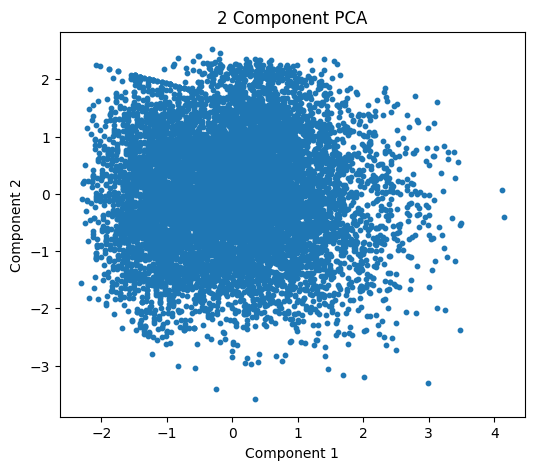

In [98]:
#Visualization of the PCA result
plt.figure(figsize=(6, 5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'],s=10)

plt.show()

In [99]:
#Silhoutte score for optimal number of cluster
silhouette_scores = []
n_clusters = range(2, 10)
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    score = silhouette_score(df2, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Number of cluster: {k}, Silhouette Score: {score:4f}")

optimal_k = n_clusters[np.argmax(silhouette_scores)]
n1 = optimal_k
print(f"Optimal number of cluster: {n1}")

Number of cluster: 2, Silhouette Score: 0.804696
Number of cluster: 3, Silhouette Score: 0.703800
Number of cluster: 4, Silhouette Score: 0.693199
Number of cluster: 5, Silhouette Score: 0.693718
Number of cluster: 6, Silhouette Score: 0.696285
Number of cluster: 7, Silhouette Score: 0.685872
Number of cluster: 8, Silhouette Score: 0.691030
Number of cluster: 9, Silhouette Score: 0.692429
Optimal number of cluster: 2


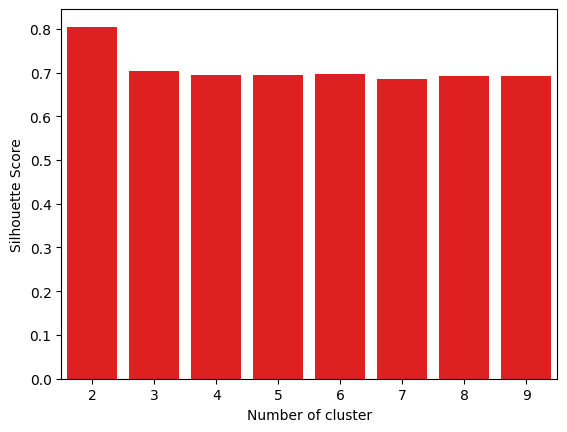

In [124]:
#Plotting the silhoutte score
plt.figure()
sns.barplot(x=n_clusters,y=silhouette_scores,color = 'red')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.show()

The optimum number of cluster is 2, with it higher score near 0.8.

In [114]:
#Apply K-means clustering 
kmeans = KMeans(n_clusters=n1, init='k-means++', random_state=1)
y_kmeans = kmeans.fit_predict(pca_2)

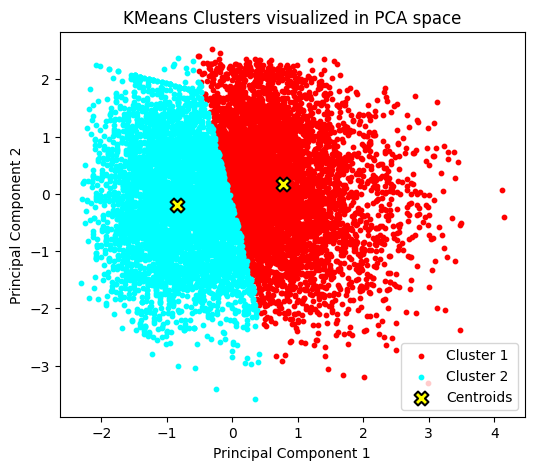

In [115]:
#Visualization of clustering result
plt.figure(figsize=(6, 5))
colors = ['red','cyan']
for i in range(n):
    plt.scatter(pca_2[y_kmeans == i, 0], pca_2[y_kmeans == i, 1],
        s=10, c=colors[i], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, 
    c='yellow', label='Centroids', marker='X',edgecolor='black', linewidth=1.5)
plt.title('KMeans Clusters visualized in PCA space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
#Adding clustering result and principal components to the dataset
df['principal component 1'] = PCA_dataset1['component1']
df['principal component 2'] = PCA_dataset1['component2']
df['Cluster'] = y_kmeans

In [ ]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  ...  IsActiveMember  EstimatedSalary  \
0       2       0.00              1  ...               1        101348.88   
1       1   83807.86              1  ...               1        112542.58   
2       8  159660.80              3  ...               0        113931.57   
3       1       0.00              2  ...               0         93826.63   
4       2  125510.82              1  ...               1         79084.10   

   Exited  Complain  Satisfaction Score  Card Type Point Earned  \
0       1         1      

In [ ]:
#Clustering result for each customer
cluster_output = df[['CustomerId', 'Cluster']]
print(cluster_output)

      CustomerId  Cluster
0       15598695        1
1       15649354        0
2       15737556        0
3       15671610        1
4       15625092        0
...          ...      ...
9995    15583480        1
9996    15620341        1
9997    15613886        1
9998    15792916        0
9999    15710408        0

[10000 rows x 2 columns]


In [ ]:
#Grouping customer based on cluster
clustered_projects = df.groupby('Cluster')['CustomerId'].apply(list)

for cluster_id, projects in clustered_projects.items():
    print(f"Cluster {cluster_id}: {projects}")

Cluster 0: [15649354, 15737556, 15625092, 15741032, 15750014, 15768359, 15805769, 15756196, 15687903, 15673223, 15761168, 15750569, 15712121, 15814923, 15619238, 15593468, 15718454, 15789498, 15744691, 15708289, 15790412, 15741416, 15598894, 15663294, 15572728, 15674433, 15641170, 15806284, 15690958, 15682322, 15579915, 15681928, 15734005, 15592578, 15775709, 15602282, 15717879, 15794468, 15572657, 15800295, 15684921, 15720676, 15692406, 15764405, 15687372, 15811026, 15742442, 15758692, 15568238, 15694349, 15718465, 15584776, 15777772, 15742886, 15586135, 15616152, 15721460, 15727317, 15649536, 15668142, 15701176, 15708422, 15744606, 15656086, 15644796, 15707479, 15579826, 15641604, 15587240, 15601594, 15589969, 15703728, 15617790, 15778526, 15670584, 15628992, 15719624, 15812767, 15692259, 15656426, 15789582, 15651103, 15763922, 15624323, 15688612, 15587174, 15813095, 15705281, 15588449, 15794849, 15620000, 15799720, 15711287, 15613102, 15677146, 15722425, 15721779, 15579548, 15658589